## QUESTIONS

#### I have an intuitive understanding, but don't fully get the results. They're abstract. Since I don't fully understand them, I'm not sure how to plot as the curriculum the data

In [430]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.cluster.vq import vq, kmeans, whiten

In [431]:
# Load the UN countries data set.
UN_data = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/curric-data-001-data-sets/master/un/un.csv')

In [432]:
# Determine how many rows are in the dataset.
print "there are {} rows in the data".format(len(UN_data))

# Determine the number of non-null values present in each column.
nulls = UN_data.isnull().sum()
nulls.sort_values()

there are 207 rows in the data


country                     0
region                      0
infantMortality             6
tfr                        10
GDPperCapita               10
lifeMale                   11
lifeFemale                 11
economicActivityMale       42
economicActivityFemale     42
illiteracyMale             47
illiteracyFemale           47
contraception              63
educationMale             131
educationFemale           131
dtype: int64

##### InfantMortality, tft, GDPperCapita, lifeMale and lifeFemale look like the best variables to cluster given they have the lowest levels of null values

In [433]:
# Determine the data type of each column.
for column in UN_data.columns:
    print UN_data[column].dtype

object
object
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [434]:
# How many countries are present in the dataset?
print "there are {} countries".format(len(UN_data['country'].unique().tolist()))

there are 207 countries


In [435]:
# We're going to explore 1 to 10 clusters. Define a range K from 1 to 10.

K = range(1,11)

# Apply scipy.cluster.vq.kmeans 1 to 10 and determine the cluster centroids.
# Calculate the distance between each point and each cluster centroid.
# Determine the closest centroid for each point.

data = UN_data.loc[:,('lifeMale', 'lifeFemale', 'infantMortality', 'GDPperCapita')]
data.dropna(inplace=True)
whiten_data = whiten(data)

centroids = {}
for k in K:
    codebook, distortion = kmeans(whiten_data, k)
    code, dist = vq(whiten_data, codebook)
    centroid = np.array(dist).tolist()
    centroids[k] = centroid

In [436]:
# Calculate the average within-cluster sum of squares for each centroid.
distances = {}
for k, c in centroids.iteritems():
    sumOfSquares = 0
    for centroid in c:
        sumOfSquares += centroid**2
    distances[k] = round(sumOfSquares / len(v), 1)

print distances,

{1: 4.0, 2: 1.5, 3: 0.7, 4: 0.5, 5: 0.4, 6: 0.3, 7: 0.3, 8: 0.2, 9: 0.2, 10: 0.2}


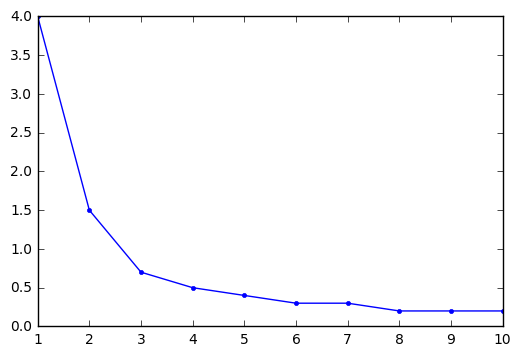

In [437]:
# Plot the number of clusters against the average within-cluster sum of squares.
# At what number of clusters does the curve seem to "level out"?

x = distances.keys()
y = distances.values()

plt.plot(x, y, marker='.')
plt.show()

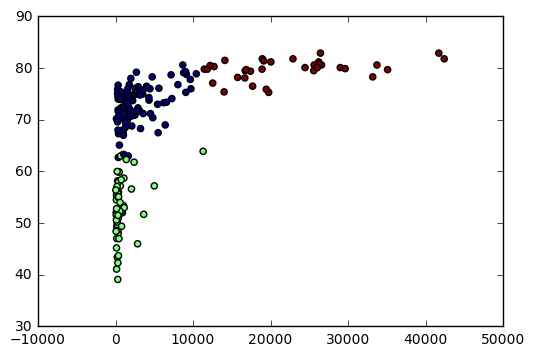

In [438]:
# Cluster the UN dataset using k-means clustering with 3 clusters.
# Plot the results

codebook, distortion = kmeans(whiten_data, 3)
code, dist = vq(whiten_data, codebook)

clasif = data[code]
claslifeMale = results[:, 0]
lifeFemale = results[:, 1]
infantMortality = results[:, 2]
GDPperCapita = results[:, 3]

plt.scatter(data['GDPperCapita'], data['lifeFemale'], c=code)
plt.show()